# League Of Legends - Classification Problem


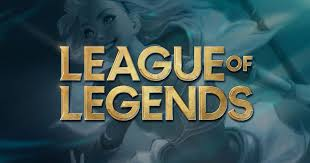

In [384]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
league = pd.read_csv(r'C:\Users\USER\Desktop\מבוא למדעי הנתונים\ranked_10min.csv')
pd.set_option("max_columns", None)
league

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


Deleting the colum of 'gameId' because it doesn't contribute for understanding the data


In [385]:
league.drop(['gameId'], axis = 1, inplace=True)

Predicting the victory of a team just from one column of information to form a basic knowledge of what column to keep and what to discard

In [386]:
y = league.blueWins
y = np.array(y)
x = league
knn = KNeighborsClassifier(n_neighbors = 5)
X = []
Acc = []
for i in league:
    temp = league[i]
    temp = pd.DataFrame(temp)
    knn.fit(temp, y)
    y_pred = knn.predict(temp)
    acc = metrics.accuracy_score(y, y_pred)
    Acc.append(acc)
    print(i ," ",acc)
    if acc > 0.75 and acc < 1: # Creating an array of the important features(above 0.75 accuracy for feature)
        X.append(i)

blueWins   1.0
blueWardsPlaced   0.5189796538111144
blueWardsDestroyed   0.5090596214191719
blueFirstBlood   0.6008705334548031
blueKills   0.6162567061443466
blueDeaths   0.6039072780645814
blueAssists   0.5716165603806054
blueEliteMonsters   0.5009616357930965
blueDragons   0.3970037453183521
blueHeralds   0.46330600263184535
blueTowersDestroyed   0.5248506933900192
blueTotalGold   0.7498734689745926
blueAvgLevel   0.615548132402065
blueTotalExperience   0.7392448628403685
blueTotalMinionsKilled   0.5444883085332524
blueTotalJungleMinionsKilled   0.5233323210851301
blueGoldDiff   0.779836015791072
blueExperienceDiff   0.7705233323210852
blueCSPerMin   0.5445895333535783
blueGoldPerMin   0.7499746937949185
redWardsPlaced   0.5066302257313493
redWardsDestroyed   0.5006579613321186
redFirstBlood   0.4990383642069035
redKills   0.6039072780645814
redDeaths   0.6162567061443466
redAssists   0.5835610891790667
redEliteMonsters   0.424233221986031
redDragons   0.4990383642069035
redHeralds 

The next graph is from the data printed above


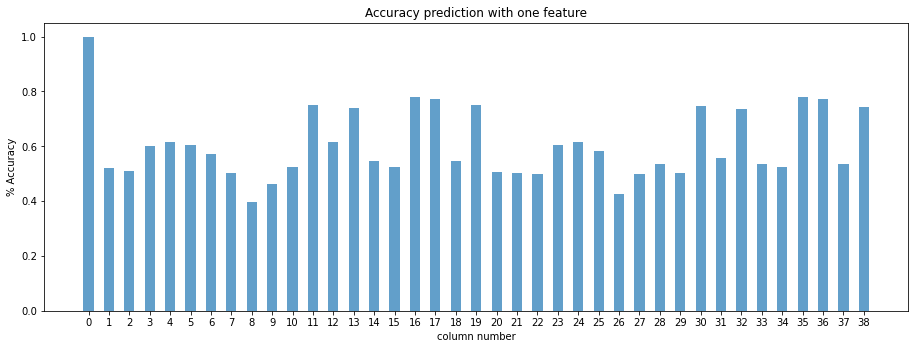

In [387]:
col = np.arange(len(league.columns))
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
plt.bar(col, Acc, width=0.5, alpha=0.7)
plt.xlabel('column number')
plt.ylabel('% Accuracy')
axes.set_xticks(col)
plt.title("Accuracy prediction with one feature")
print("The next graph is from the data printed above")
plt.show()

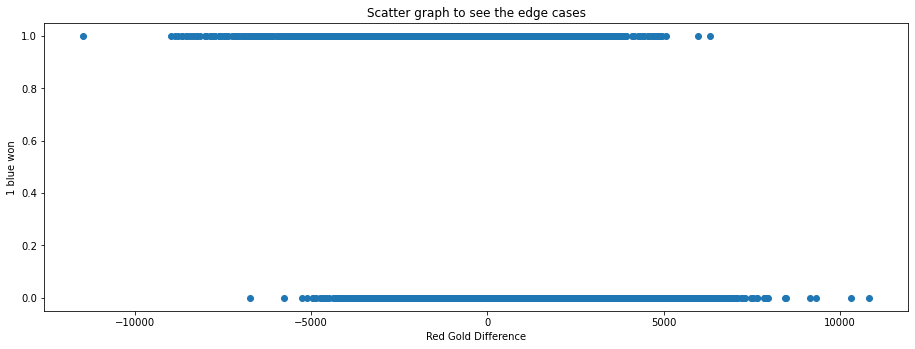

In [388]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
plt.scatter(league['redGoldDiff'], y)
plt.xlabel('Red Gold Difference')
plt.ylabel('1 blue won')
plt.title("Scatter graph to see the edge cases")
plt.show()

In the next cell I will get rid of the edge cases:

Whenever a team had a huge lead on gold and experience but still lost the game I will consider it as an abnormal senerio

In [389]:
league.drop(league.loc[(league['redGoldDiff'] < -4500) & (league['blueWins'] == 0)].index, axis = 0, inplace=True)
league.drop(league.loc[(league['redGoldDiff'] >  4500) & (league['blueWins'] == 1)].index, axis = 0, inplace=True)

In [390]:
league.drop(league.loc[(league['redExperienceDiff'] < -4500) & (league['blueWins'] == 0)].index, axis = 0, inplace=True)
league.drop(league.loc[(league['redExperienceDiff'] >  4500) & (league['blueWins'] == 1)].index, axis = 0, inplace=True)

We can tell that the most important information to take in order to predict wich team would win is about the gold and experience

In [391]:
y = league.blueWins
y = np.array(y)

In [392]:
relevantDF = league[X]
K = [1,3,5,7,10,25,50,100]
print("This is the knn moudle with only the important data")
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.2,random_state=1)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    print("knn =", k,": ",metrics.accuracy_score(y_test, y_pred))

This is the knn moudle with only the important data
knn = 1 :  0.6439817166074149
knn = 3 :  0.6851193499238192
knn = 5 :  0.6947689182326053
knn = 7 :  0.7054342305738954
knn = 10 :  0.7064499746063991
knn = 25 :  0.7267648552564754
knn = 50 :  0.7435246317927883
knn = 100 :  0.7450482478415439


In [393]:
print("This is the knn moudle with all the data")
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(league, y, test_size=0.2,random_state=1)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    print("knn =", k,": ",metrics.accuracy_score(y_test, y_pred))

This is the knn moudle with all the data
knn = 1 :  0.6439817166074149
knn = 3 :  0.686135093956323
knn = 5 :  0.7084814626714068
knn = 7 :  0.7105129507364144
knn = 10 :  0.7171152869476892
knn = 25 :  0.7333671914677501
knn = 50 :  0.750126968004063
knn = 100 :  0.7440325038090401


In [394]:
print(relevantDF.shape)
print(league.shape)

(9844, 4)
(9844, 39)


We can see from the results above that when we are taking the important data with 10 culomn we are getting approximately the same result as if we are taking all the features in the data

### Analyzing data correlation:

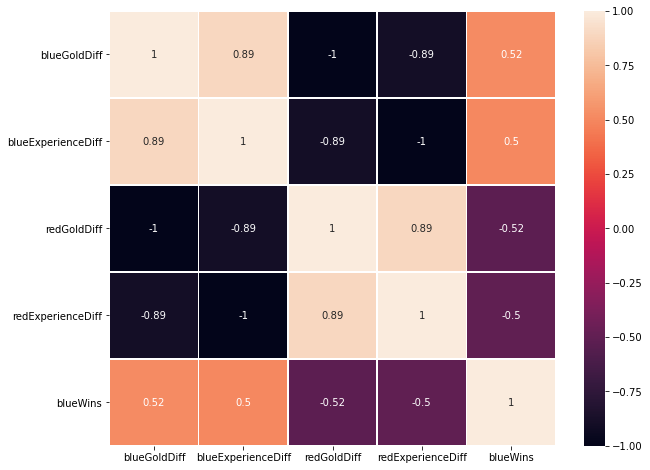

In [395]:
X.append('blueWins')
relevantDF = league[X]
axes = plt.subplots(1, 1, figsize=(10, 8))
axes = sns.heatmap(relevantDF.corr(), annot=True , linewidths=0.5)

From the heat map above we can see that we can take even less features because some of the features can be repetitive like 'blueGoldDiff' and 'redGoldDiff'

In [396]:
relevantDF = league[['blueExperienceDiff' ,'blueGoldDiff' ,'redTotalGold']]
knn = KNeighborsClassifier(n_neighbors = 50)
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.2,random_state=1)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print("knn = 50",": ",metrics.accuracy_score(y_test, y_pred))

knn = 50 :  0.7409852717115287


With only three features we got 74% Accuracy.
Only 0.0092% accuracy difference when using all the data!

### Dimensionality Redaction:

The amount of wards is not helping basically you place a ward so you will see if someone is coming to help the enemy kill you but we have a column for the kills.

In [397]:
league.drop(['blueWins'], axis = 1, inplace=True)
league.drop(['blueWardsPlaced','blueWardsDestroyed'], axis = 1, inplace=True)
league.drop(['redWardsPlaced','redWardsDestroyed'], axis = 1, inplace=True)

### Dummy module option:

In [398]:
print("Amount of victories for each team (0 - red victory , 1 - blue victory)")
print(pd.value_counts(y))

Amount of victories for each team (0 - red victory , 1 - blue victory)
0    4929
1    4915
dtype: int64


In [399]:
print("Accuracy for dummy moudle in the test group ",y_test.mean())
print("Accuracy for dummy moudle for all the group ",y.mean())

Accuracy for dummy moudle in the test group  0.5114271203656678
Accuracy for dummy moudle for all the group  0.49928890694839495


If we were to use dummy moudle it would be insuffisant with accuracy of about 50% and in the knn moudle we get about 74% accuracy

### KNN module with no test and train group:

In [400]:
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(league, y)
    y_pred = knn.predict(x)
    print("knn =", k,": ",metrics.accuracy_score(y, y_pred))

knn = 1 :  1.0
knn = 3 :  0.8215156440471353
knn = 5 :  0.7862657456318569
knn = 7 :  0.7671678179601787
knn = 10 :  0.7536570499796831
knn = 25 :  0.7407557903291345
knn = 50 :  0.7352702153596099
knn = 100 :  0.7313084112149533


When the knn is 1 so there is 100% accuracy this is called overfitting because with all the existing data it will perform perfect but once we insert new data to predict this kind of moudle won't give us the best results, I would have take knn = 3
because it will give a 82% accuracy with enough neighbours for comparison.

** This moudle is more accurate then the ones we saw above because here we didn't split the data to test group and learning group

### <b>Improving the module:</b>

After getting to accuarcy of 74% I wanted to improve it so I took all the indexes that the predicted probabilty was 0.45-0.55
meaning there's a chance of mistake in the prediction.
so I took 2 different features built a new module with them and relied on that module, even though this module alone has accuracy of 61%

In [401]:
monster = league[['redEliteMonsters' , 'blueEliteMonsters']]
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(monster, y, test_size=0.2,random_state=1)
knn.fit(X_train , y_train)
y_pred2 = knn.predict(X_test)
print("knn = 5",":",metrics.accuracy_score(y_test, y_pred2))
prob2 = pd.DataFrame(knn.predict_proba(X_test))
prob2.head()

knn = 5 : 0.5804977145759269


,0,1
0,0.4,0.6
1,0.8,0.2
2,0.4,0.6
3,0.8,0.2
4,0.8,0.2


In [402]:
knn = KNeighborsClassifier(n_neighbors=50)
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.2,random_state=1)
knn.fit(X_train , y_train)
y_pred1 = knn.predict(X_test)
check = pd.DataFrame(knn.predict_proba(X_test))#converting it to df to use loc
ind = check.loc[(check[0] > 0.45) & (check[0] < 0.55)].index
prob1 = (knn.predict_proba(X_test))
for i in ind:
    prob1[i][0] = prob2.loc[i][0]
    prob1[i][1] = prob2.loc[i][1]
prob1[prob1 > 0.5] = 1
prob1[prob1 <= 0.5] = 0
print('Accuracy after improving the module: ' ,metrics.accuracy_score(y_test, prob1[:,1]))
print('Improved by 0.5%')

Accuracy after improving the module:  0.7450482478415439
Improved by 0.5%


Here we can see an attempt to improve to module with Elite monster data but with very little succsess for the amount of work

### *KNN: Cofusion Matrix*

In [403]:
confusion = metrics.confusion_matrix(y_test, prob1[:,1])
print("confusion matrix: ")
print(confusion)

confusion matrix: 
[[708 254]
 [248 759]]


In [404]:
TP = confusion[1, 1]
print("True positive: " ,TP)
TN = confusion[0, 0]
print("True nagetive: " ,TN)
FP = confusion[0, 1]
print("False positive: " ,FP)
FN = confusion[1, 0]
print("False nagetive: " ,FN)

True positive:  759
True nagetive:  708
False positive:  254
False nagetive:  248


In [405]:
print("Accuracy: ",(TP + TN) / (TP + TN + FP + FN))
print("Classification Error: ",1-(TP + TN) / (TP + TN + FP + FN))
print("Recall: ", TP/(TP+FN))
print("Precision: ", TP/(TP+FP))
print("False positive rate: ", FP/(TN+FP))

Accuracy:  0.7450482478415439
Classification Error:  0.2549517521584561
Recall:  0.7537239324726912
Precision:  0.7492596248766041
False positive rate:  0.26403326403326405


In [406]:
b = 1
F = (1+b*b)*TP/((1+b*b)*TP + b*FN + FP)
print(F)

0.7514851485148515


### <b>Classification with Gaussian module</b>

In [407]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.2, random_state=1)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy when using the Gaussian module:" ,accuracy_score(y_test, y_pred))

Accuracy when using the Gaussian module: 0.7333671914677501


### *ROC Graph for Gaussian module:*

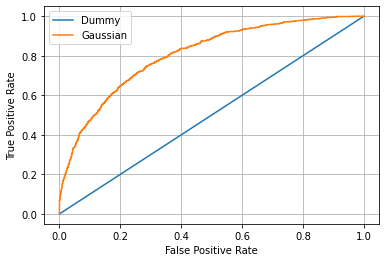

In [408]:
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.3, random_state=2)
y_pred = gnb.predict_proba(X_test)
y_pred = y_pred[:, 1] # taking only the positive outcomes
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)#using a saved function that to calculate the roc curve
plt.plot([0,1], [0,1], label='Dummy')
plt.plot(fpr, tpr, marker='', label='Gaussian')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

### Cross Validiation:

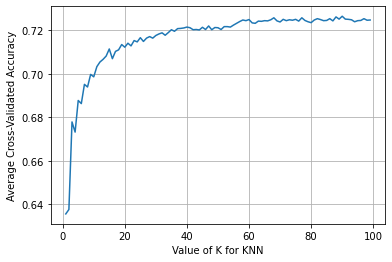

In [409]:
K = np.arange(1,100)
scores = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    CV = cross_val_score(knn, relevantDF ,y, cv = 10 ,scoring='accuracy')
    scores.append(CV.mean())
plt.plot(K, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Average Cross-Validated Accuracy')
plt.grid(True)
plt.show()

In [410]:
print("The maximum average score when using cross validation is :",max(scores))
print("When the knn = ", scores.index(max(scores))+1)

The maximum average score when using cross validation is : 0.7264324625479757
When the knn =  90
